In [27]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns

%matplotlib inline

In [28]:
# fetch dataset 
diabetesData = fetch_ucirepo(id=296) 
  
# data (as pandas dataframes) 
table = diabetesData.data.features 
y = diabetesData.data.targets 
    

/opt/homebrew/lib/python3.11/site-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


# Add categorical data, helper vars, Map Data

In [29]:
table['time_in_hospital_label'] = table['time_in_hospital'].apply(lambda value: "short" if value < 3 else "medium" if value < 6 else "long")
table['usedMeds'] = table['diabetesMed'].apply(lambda value: 1 if value == "yes" else 0)
table["changeInMeds"] = table["change"].apply(lambda value: 1 if value == "yes" else 0)

table["ageThreshold"] = table["age"].apply(lambda value: 0 if value == "[0-10)" else
                                                10 if value == "[10-20)" else
                                                20 if value == "[20-30)" else
                                                30 if value == "[30-40)" else
                                                40 if value == "[40-50)" else
                                                50 if value == "[50-60)" else
                                                60 if value == "[60-70)" else
                                                70 if value == "[70-80)" else
                                                80 if value == "[80-90)" else
                                                90 if value == "[90-100)" else
                                                "Unknown")
admissionTypeMap = {
    1: "Emergency",
    2: "Urgent",
    3: "Elective",
    4: "Newborn",
    5: "Not Available",
    6: "NULL",
    7: "Trauma Center",
    8: "Not Mapped"
}

dischargeDispositionMap = {
    1: "Discharged to home",
    2: "Discharged/transferred to another short term hospital",
    3: "Discharged/transferred to SNF",
    4: "Discharged/transferred to ICF",
    5: "Discharged/transferred to another type of inpatient care institution",
    6: "Discharged/transferred to home with home health service",
    7: "Left AMA",
    8: "Discharged/transferred to home under care of Home IV provider",
    9: "Admitted as an inpatient to this hospital",
    10: "Neonate discharged to another hospital for neonatal aftercare",
    11: "Expired",
    12: "Still patient or expected to return for outpatient services",
    13: "Hospice / home",
    14: "Hospice / medical facility",
    15: "Discharged/transferred within this institution to Medicare approved swing bed",
    16: "Discharged/transferred/referred another institution for outpatient services",
    17: "Discharged/transferred/referred to this institution for outpatient services",
    18: "NULL",
    19: "Expired at home. Medicaid only, hospice.",
    20: "Expired in a medical facility. Medicaid only, hospice.",
    21: "Expired, place unknown. Medicaid only, hospice.",
    22: "Discharged/transferred to another rehab fac including rehab units of a hospital",
    23: "Discharged/transferred to a long term care hospital",
    24: "Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare",
    25: "Not Mapped",
    26: "Unknown/Invalid",
    30: "Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere",
    27: "Discharged/transferred to a federal health care facility",
    28: "Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital",
    29: "Discharged/transferred to a Critical Access Hospital (CAH)"
}

admissionSourceMap = {
    1: "Physician Referral",
    2: "Clinic Referral",
    3: "HMO Referral",
    4: "Transfer from a hospital",
    5: "Transfer from a Skilled Nursing Facility (SNF)",
    6: "Transfer from another health care facility",
    7: "Emergency Room",
    8: "Court/Law Enforcement",
    9: "Not Available",
    10: "Transfer from critical access hospital",
    11: "Normal Delivery",
    12: "Premature Delivery",
    13: "Sick Baby",
    14: "Extramural Birth",
    15: "Not Available",
    17: "NULL",
    18: "Transfer From Another Home Health Agency",
    19: "Readmission to Same Home Health Agency",
    20: "Not Mapped",
    21: "Unknown/Invalid",
    22: "Transfer from hospital inpt/same fac result in a sep claim",
    23: "Born inside this hospital",
    24: "Born outside this hospital",
    25: "Transfer from Ambulatory Surgery Center",
    26: "Transfer from Hospice"
}


table['dischargeDisposition'] = table["discharge_disposition_id"].replace(dischargeDispositionMap)
table['admissionType'] = table["admission_type_id"].replace(admissionTypeMap)
table['admissionSource'] = table["admission_source_id"].replace(admissionSourceMap)
# The feature indicates whether the drug was prescribed or there was a change in the dosage. Values: up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed
medicationLambda = (lambda value: 1 if value == "Up" else -1 if value == "Down" else 0 if value == "Steady" else None)
table["metforminNumeric"] = table["metformin"].apply(medicationLambda)
table["repaglinideNumeric"] = table["repaglinide"].apply(medicationLambda)
table["nateglinideNumeric"] = table["nateglinide"].apply(medicationLambda)
table["chlorpropamideNumeric"] = table["chlorpropamide"].apply(medicationLambda)
table["glimepirideNumeric"] = table["glimepiride"].apply(medicationLambda)
table["acetohexamideNumeric"] = table["acetohexamide"].apply(medicationLambda)
table["glipizideNumeric"] = table["glipizide"].apply(medicationLambda)
table["glyburideNumeric"] = table["glyburide"].apply(medicationLambda)
table["tolbutamideNumeric"] = table["tolbutamide"].apply(medicationLambda)
table["pioglitazoneNumeric"] = table["pioglitazone"].apply(medicationLambda)
table["rosiglitazoneNumeric"] = table["rosiglitazone"].apply(medicationLambda)
table["acarboseNumeric"] = table["acarbose"].apply(medicationLambda)
table["miglitolNumeric"] = table["miglitol"].apply(medicationLambda)
table["troglitazoneNumeric"] = table["troglitazone"].apply(medicationLambda)
table["tolazamideNumeric"] = table["tolazamide"].apply(medicationLambda)
table["examideNumeric"] = table["examide"].apply(medicationLambda)
table["citogliptonNumeric"] = table["citoglipton"].apply(medicationLambda)
table["insulinNumeric"] = table["insulin"].apply(medicationLambda)
table["glyburideMetforminNumeric"] = table["glyburide-metformin"].apply(medicationLambda)
table["glipizideMetforminNumeric"] = table["glipizide-metformin"].apply(medicationLambda)
table["glimepiridePioglitazoneNumeric"] = table["glimepiride-pioglitazone"].apply(medicationLambda)
table["metforminRosiglitazoneNumeric"] = table["metformin-rosiglitazone"].apply(medicationLambda)
table["metforminPioglitazoneNumeric"] = table["metformin-pioglitazone"].apply(medicationLambda)

medicationAttributes = ["metforminNumeric",
"repaglinideNumeric",
"nateglinideNumeric",
"chlorpropamideNumeric",
"glimepirideNumeric",
"acetohexamideNumeric",
"glipizideNumeric",
"glyburideNumeric",
"tolbutamideNumeric",
"pioglitazoneNumeric",
"rosiglitazoneNumeric",
"acarboseNumeric",
"miglitolNumeric",
"troglitazoneNumeric",
"tolazamideNumeric",
"examideNumeric",
"citogliptonNumeric",
"insulinNumeric",
"glyburideMetforminNumeric",
"glipizideMetforminNumeric",
"glimepiridePioglitazoneNumeric",
"metforminRosiglitazoneNumeric",
"metforminPioglitazoneNumeric"]

numericAttributes = table.select_dtypes(include='number')

table["genderNumeric"] = table["gender"].apply(lambda value: 0 if value == "Male" else 1)

tableCopy = table
male, female = [x for _, x in tableCopy.groupby(tableCopy['genderNumeric'] == 1)]

/var/folders/1k/k31474cn5s915dzhqxj4f_bm0000gn/T/ipykernel_6097/3375131113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['time_in_hospital_label'] = table['time_in_hospital'].apply(lambda value: "short" if value < 3 else "medium" if value < 6 else "long")
/var/folders/1k/k31474cn5s915dzhqxj4f_bm0000gn/T/ipykernel_6097/3375131113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['usedMeds'] = table['diabetesMed'].apply(lambda value: 1 if value == "yes" else 0)


In [30]:
table.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,tolazamideNumeric,examideNumeric,citogliptonNumeric,insulinNumeric,glyburideMetforminNumeric,glipizideMetforminNumeric,glimepiridePioglitazoneNumeric,metforminRosiglitazoneNumeric,metforminPioglitazoneNumeric,genderNumeric
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,NaN,None,None,1.0,NaN,NaN,NaN,NaN,NaN,1
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,1
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,NaN,None,None,1.0,NaN,NaN,NaN,NaN,NaN,0
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,NaN,None,None,0.0,NaN,NaN,NaN,NaN,NaN,0


# Exploratory Data Analysis

## Descriptive Statistics

### General

In [31]:
subset_attributes = ["time_in_hospital", "num_medications", "num_procedures", "num_lab_procedures", "number_outpatient", "number_emergency", "number_diagnoses", "weight"]
ds = table[subset_attributes].describe()
display(ds)

,time_in_hospital,num_medications,num_procedures,num_lab_procedures,number_outpatient,number_emergency,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,4.395987,16.021844,1.339730,43.095641,0.369357,0.197836,7.422607
std,2.985108,8.127566,1.705807,19.674362,1.267265,0.930472,1.933600
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,2.000000,10.000000,0.000000,31.000000,0.000000,0.000000,6.000000
50%,4.000000,15.000000,1.000000,44.000000,0.000000,0.000000,8.000000
75%,6.000000,20.000000,2.000000,57.000000,0.000000,0.000000,9.000000
max,14.000000,81.000000,6.000000,132.000000,42.000000,76.000000,16.000000


In [32]:
ds = table[medicationAttributes].describe()
display(ds)

,metforminNumeric,repaglinideNumeric,nateglinideNumeric,chlorpropamideNumeric,glimepirideNumeric,acetohexamideNumeric,glipizideNumeric,glyburideNumeric,tolbutamideNumeric,pioglitazoneNumeric,...,acarboseNumeric,miglitolNumeric,troglitazoneNumeric,tolazamideNumeric,insulinNumeric,glyburideMetforminNumeric,glipizideMetforminNumeric,glimepiridePioglitazoneNumeric,metforminRosiglitazoneNumeric,metforminPioglitazoneNumeric
count,19988.000000,1539.000000,703.000000,86.00000,5191.000000,1.0,12686.000000,10650.000000,23.0,7328.000000,...,308.000000,38.000000,3.0,39.000000,54383.000000,706.000000,13.0,1.0,2.0,1.0
mean,0.024615,0.042235,0.018492,0.05814,0.025621,0.0,0.016554,0.023286,0.0,0.015830,...,0.022727,-0.078947,0.0,0.025641,-0.016586,0.002833,0.0,0.0,0.0,0.0
std,0.285565,0.314635,0.222520,0.28095,0.315799,NaN,0.323379,0.358708,0.0,0.218611,...,0.204517,0.427537,0.0,0.160128,0.657631,0.140890,0.0,NaN,0.0,NaN
min,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,0.0,-1.000000,-1.000000,0.0,-1.000000,...,-1.000000,-1.000000,0.0,0.000000,-1.000000,-1.000000,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,1.000000,1.000000,1.000000,1.00000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0


Die Medikamente *Metformin-Rosiglitazone*, *Metformin-Pioglitazone*, *Glimepiride-Pioglitazone*, *Acetohexamide*, *Tolbutamide*, *Troglitazone*, *Glipizide-Metformin*, *Miglitol*, *Tolazamide* und *Chlorpropamide* werden vernachlässigt, das sie nicht genügend Daten haben (siehe Count, <100)

In [33]:
medsToRemove = ["acetohexamideNumeric", "tolbutamideNumeric", "troglitazoneNumeric", "metforminPioglitazoneNumeric", "metforminRosiglitazoneNumeric", "glimepiridePioglitazoneNumeric", "glipizideMetforminNumeric", "miglitolNumeric", "tolazamideNumeric", "chlorpropamideNumeric", "examideNumeric", "citogliptonNumeric"]
for item in medsToRemove:
    medicationAttributes.remove(item)

## Grouped

In [34]:
subset_attributes = ["num_medications", "num_procedures", "number_emergency", "number_diagnoses"]

ss = table[table["time_in_hospital_label"] == "short"]
dss = round(ss[subset_attributes].describe(), 2)
ms = table[table["time_in_hospital_label"] == "medium"]
dms = round(ms[subset_attributes].describe(), 2)
ls = table[table["time_in_hospital_label"] == "long"]
dls = round(ls[subset_attributes].describe(), 2)
pd.concat([dss, dms, dls], axis=1, keys=['Short Time in Hsp.', 'Medium Time in Hsp.', 'Long Time in Hsp.'])



Short Time in Hsp.                                                   \
         num_medications num_procedures number_emergency number_diagnoses   
count           31432.00       31432.00         31432.00         31432.00   
mean               11.88           1.12             0.21             6.86   
std                 5.56           1.67             1.07             2.10   
min                 1.00           0.00             0.00             1.00   
25%                 8.00           0.00             0.00             5.00   
50%                11.00           0.00             0.00             7.00   
75%                15.00           2.00             0.00             9.00   
max                48.00           6.00            76.00            16.00   

      Medium Time in Hsp.                                                   \
          num_medications num_procedures number_emergency number_diagnoses   
count            41646.00       41646.00         41646.00         41646.00   
mean                15.64           1.17             0.19             7.47   
std                  6.77           1.54             0.91             1.89   
min                  1.00           0.00             0.00             1.00   
25%                 11.00           0.00             0.00             6.00   
50%                 15.00           1.00             0.00             8.00   
75%                 19.00           2.00             0.00             9.00   
max                 63.00           6.00            63.00            16.00   

      Long Time in Hsp.                                                   
        num_medications num_procedures number_emergency number_diagnoses  
count          28688.00       28688.00         28688.00         28688.00  
mean              21.12           1.82             0.19             7.98  
std                9.42           1.86             0.78             1.59  
min                1.00           0.00             0.00             1.00  
25%               15.00           0.00             0.00             7.00  
50%               20.00           1.00             0.00             9.00  
75%               26.00           3.00             0.00             9.00  
max               81.00           6.00            22.00            16.00

> Je länger man im Krankenhaus ist, desto mehr Medikamente werden einem durchschnittlich verschrieben und desto mehr Diagnosen bekommt man durchschnittlich.

In [35]:
caucasian = table[table['race']=='Caucasian']
africanAmerican = table[table['race']=='AfricanAmerican']
asian = table[table['race']=='Asian']
hispanic = table[table['race']=='Hispanic']

dc = round(caucasian[subset_attributes].describe(), 2)
daa = round(africanAmerican[subset_attributes].describe(),2)
da = round(asian[subset_attributes].describe(),2)
dh = round(hispanic[subset_attributes].describe(),2)
pd.concat([dc, daa, da, dh], axis=1, keys=['Caucasian', 'African American', 'Asian', 'Hispanic'])


Caucasian                                                   \
      num_medications num_procedures number_emergency number_diagnoses   
count        76099.00       76099.00         76099.00         76099.00   
mean            16.29           1.37             0.19             7.54   
std              8.17           1.74             0.95             1.88   
min              1.00           0.00             0.00             1.00   
25%             11.00           0.00             0.00             6.00   
50%             15.00           1.00             0.00             9.00   
75%             20.00           2.00             0.00             9.00   
max             81.00           6.00            76.00            16.00   

      African American                                                   \
       num_medications num_procedures number_emergency number_diagnoses   
count         19210.00       19210.00         19210.00         19210.00   
mean             15.37           1.23             0.26             7.11   
std               7.91           1.57             0.89             2.02   
min               1.00           0.00             0.00             1.00   
25%              10.00           0.00             0.00             5.00   
50%              14.00           1.00             0.00             8.00   
75%              19.00           2.00             0.00             9.00   
max              70.00           6.00            16.00            16.00   

                Asian                                                   \
      num_medications num_procedures number_emergency number_diagnoses   
count          641.00         641.00           641.00           641.00   
mean            13.29           1.34             0.09             7.05   
std              7.68           1.57             0.42             2.09   
min              1.00           0.00             0.00             1.00   
25%              8.00           0.00             0.00             5.00   
50%             12.00           1.00             0.00             8.00   
75%             17.00           2.00             0.00             9.00   
max             62.00           6.00             7.00             9.00   

             Hispanic                                                   
      num_medications num_procedures number_emergency number_diagnoses  
count         2037.00        2037.00          2037.00          2037.00  
mean            14.03           1.12             0.23             6.92  
std              7.22           1.51             0.86             2.15  
min              1.00           0.00             0.00             1.00  
25%              9.00           0.00             0.00             5.00  
50%             13.00           0.00             0.00             7.00  
75%             18.00           2.00             0.00             9.00  
max             59.00           6.00            10.00            16.00

* Die meisten der Diabetespatient:innen sind kaukasischer Abstammung. Kaukasier:innen bekommen die höchste Anzahl an Medikamenten verschrieben, haben die höchste Anzahl an Diagnosen und die meisten Eingriffe.
* African Americans haben die höchste Anzahl an Notfälle.
* Hispanics haben durchschnittlich die niedrigste Anzahl an Diagnosen.
* Asiat:innen sind die kleinste erfasste Gruppe. Sie haben auch die niedrigste Anzahl an Notfälle.

# Univariate Analysis

## Visualizing 1D

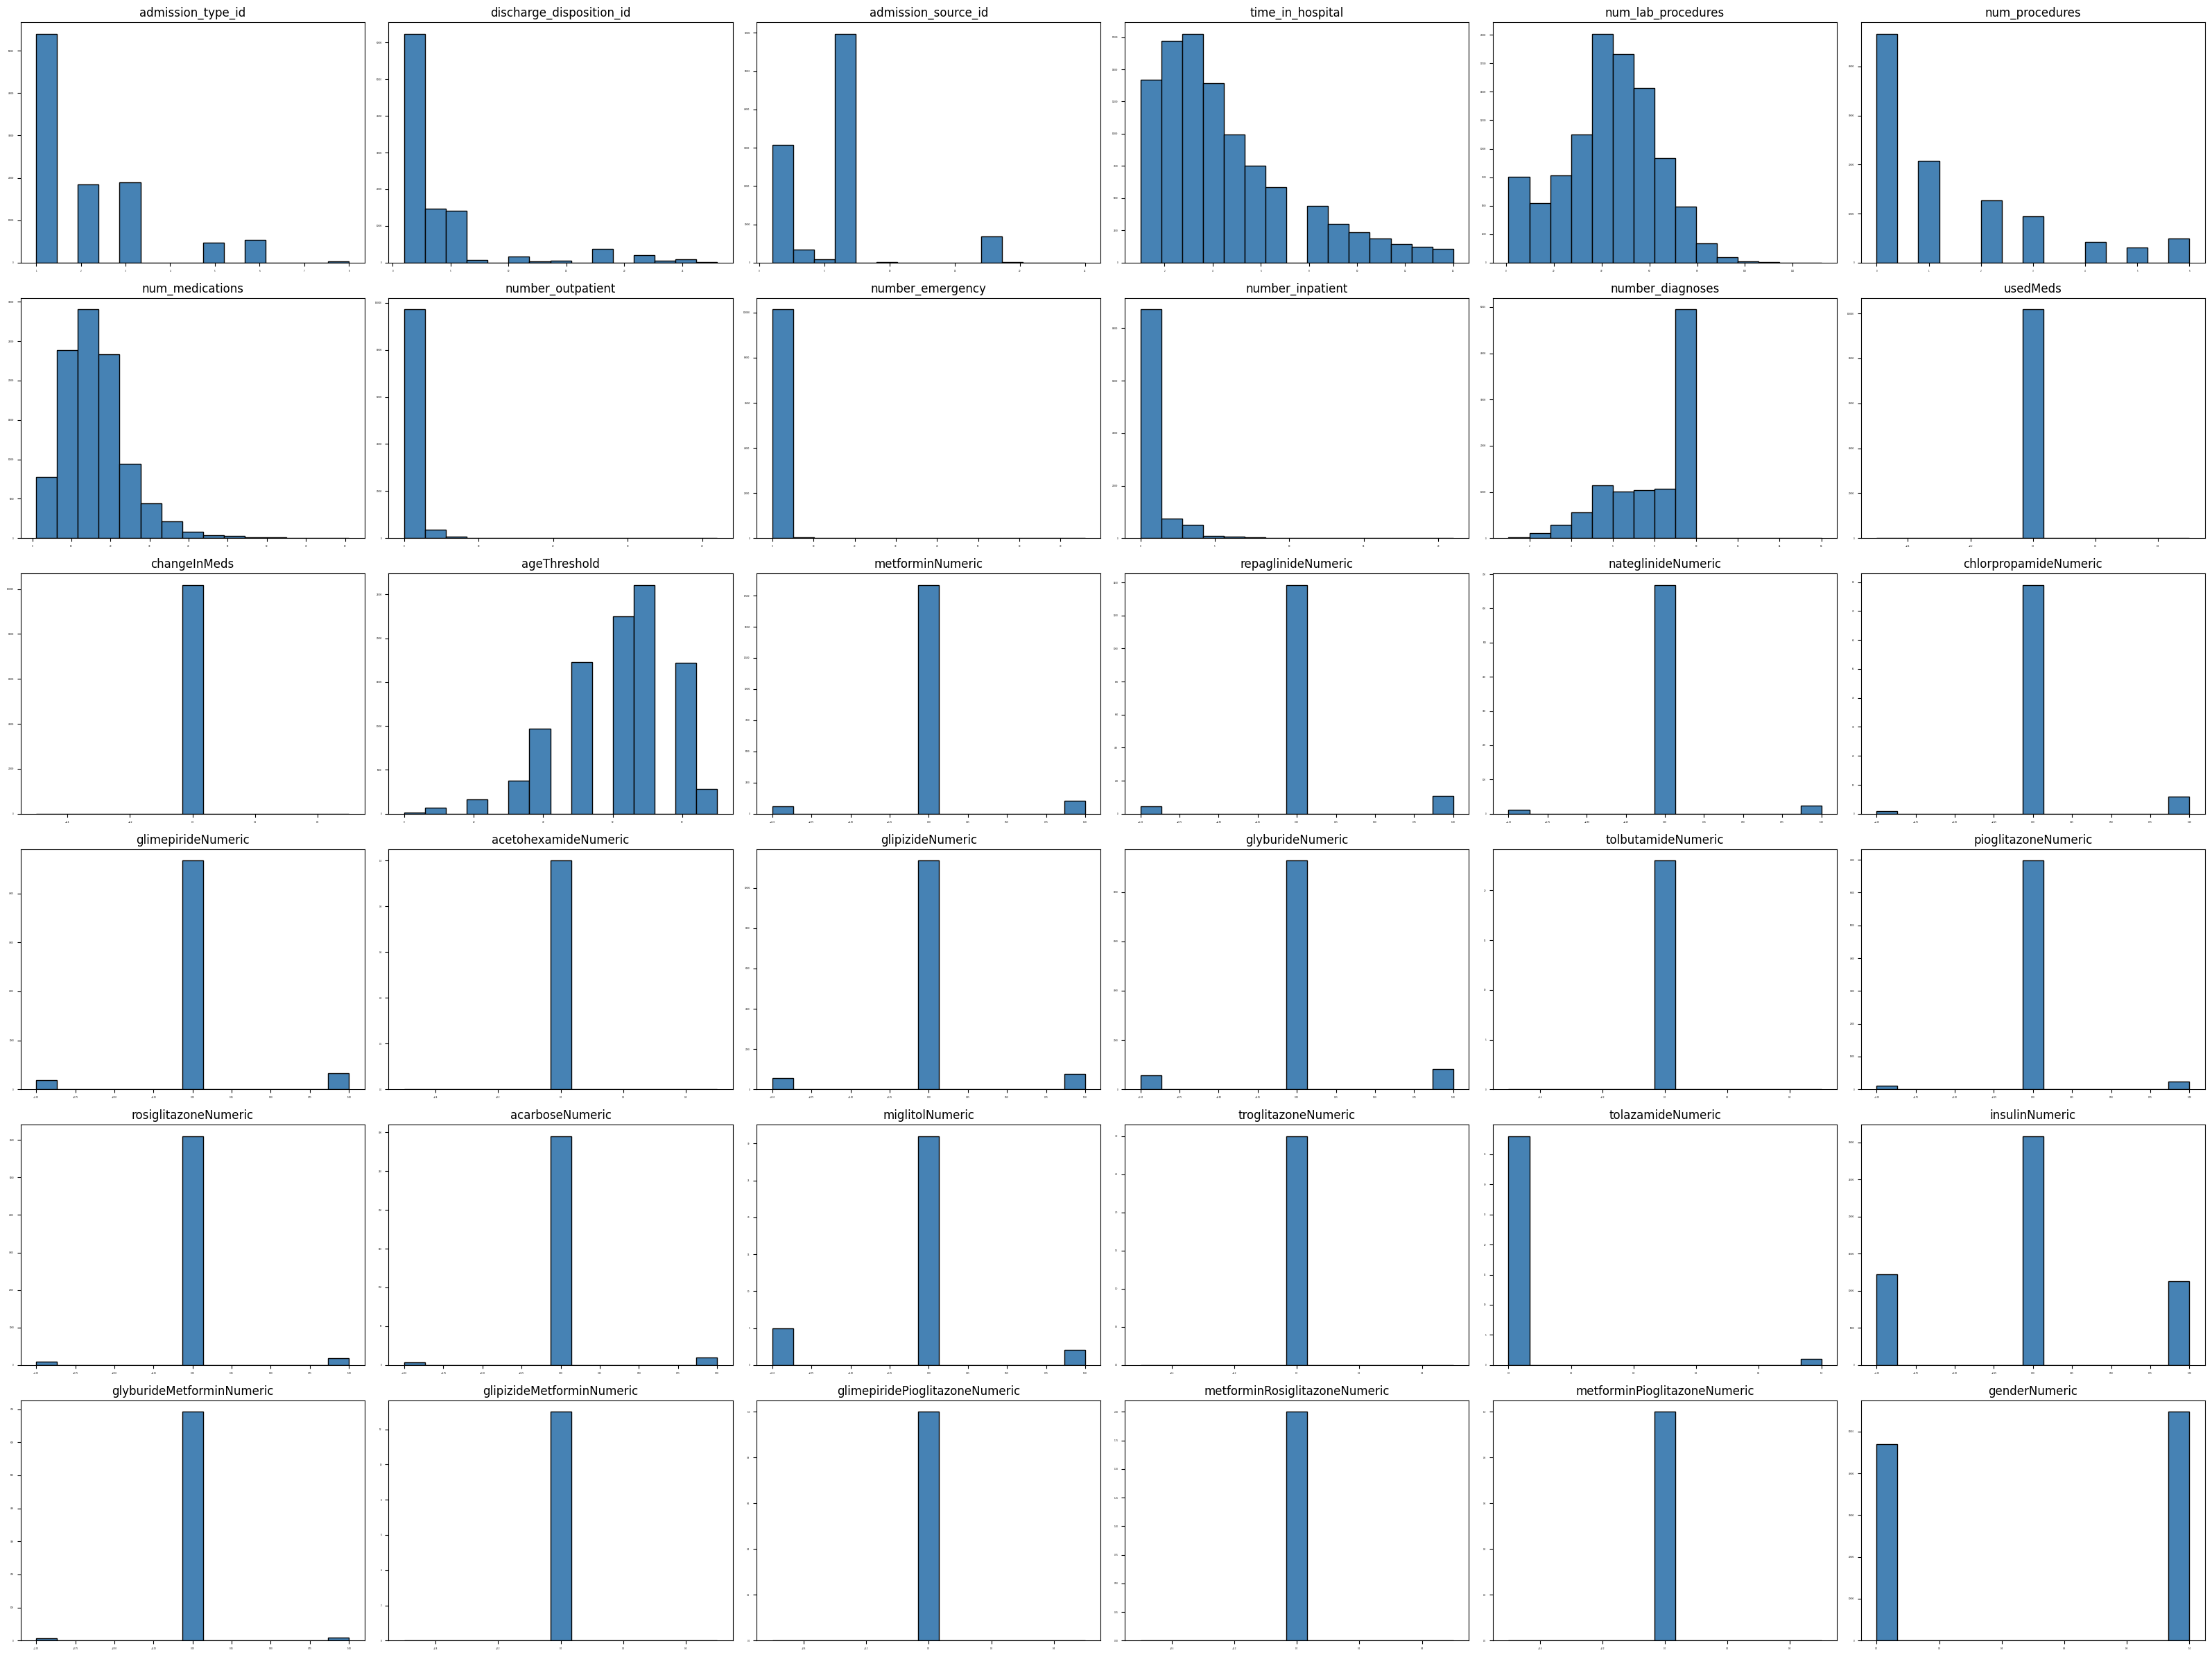

In [36]:
table.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=2, ylabelsize=2, grid=False)    
plt.tight_layout(rect=(0, 0, 5, 5))

> Die "Zeit im Krankenhaus" und "Number Of Procedures" sind annähernd Gauß'sche Verteilungen.

## Continuous, numeric attribute in 1D

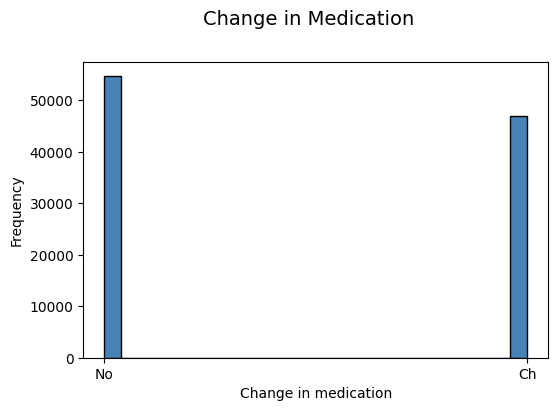

In [37]:
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Change in Medication", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Change in medication")
ax.set_ylabel("Frequency") 

freq, bins, patches = ax.hist(table['change'], color='steelblue', bins=25,
                                    edgecolor='black', linewidth=1)

> Etwas häufiger werden Medikamente nicht verändert, als dass sie verändert werden.

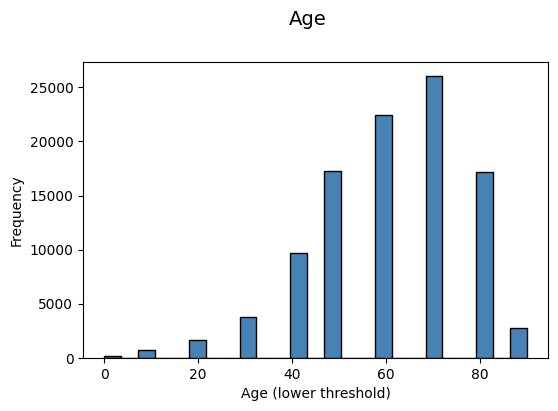

In [38]:
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Age", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Age (lower threshold)")
ax.set_ylabel("Frequency") 

freq, bins, patches = ax.hist(table['ageThreshold'], color='steelblue', bins=25,
                                    edgecolor='black', linewidth=1)

> Die meisten Patient:innen im Datensatz sind zwischen 70-80. Man sieht, mit steigendem Alter steigt die Wahrscheinlichkeit auf die Diagnose bzw. auf die Erkennung der Krankheit.

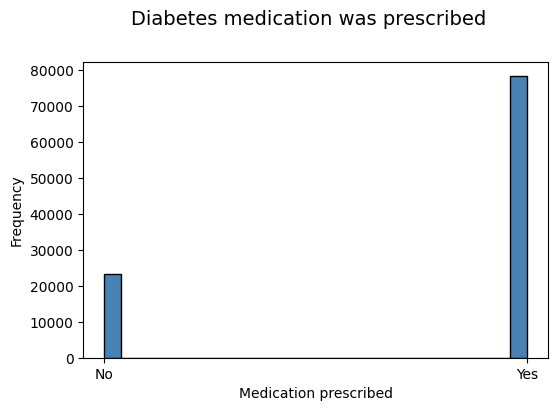

In [39]:
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Diabetes medication was prescribed", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Medication prescribed")
ax.set_ylabel("Frequency") 

freq, bins, patches = ax.hist(table['diabetesMed'], color='steelblue', bins=25,
                                    edgecolor='black', linewidth=1)

> Es gibt 4x so viele Patient:innen im Datensatz, die Medikamente verschrieben bekamen, als solche die keine verschrieben bekamen.

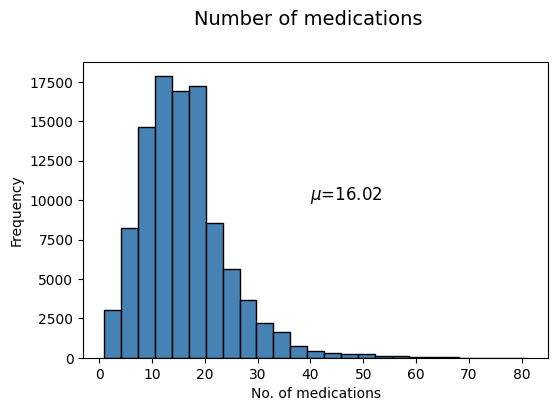

In [40]:
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Number of medications", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("No. of medications")
ax.set_ylabel("Frequency") 
ax.text(40, 10000, r'$\mu$='+str(round(table['num_medications'].mean(),2)), 
         fontsize=12)
freq, bins, patches = ax.hist(table['num_medications'], color='steelblue', bins=25,
                                    edgecolor='black', linewidth=1)

<Axes: xlabel='num_medications', ylabel='Density'>

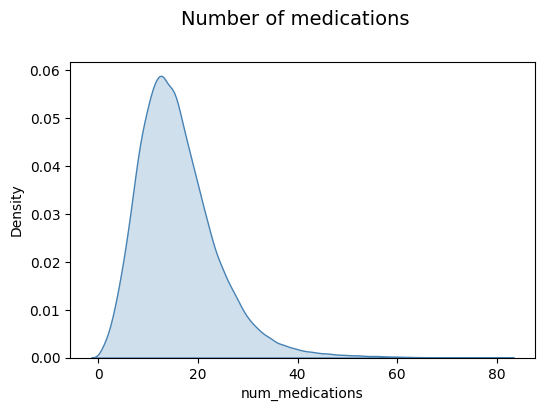

In [41]:
fig = plt.figure(figsize = (6,4))
title = fig.suptitle("Number of medications", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax1 = fig.add_subplot(1,1, 1)
ax.set_xlabel("No. of medications")
ax.set_ylabel("Frequency")  
sns.kdeplot(table['num_medications'], ax=ax1, fill=True, color='steelblue')

> Die meisten Patient:innen bekamen zwischen 10-20 Medikamente verschrieben.

### Discrete, categorical attribute in 1-D

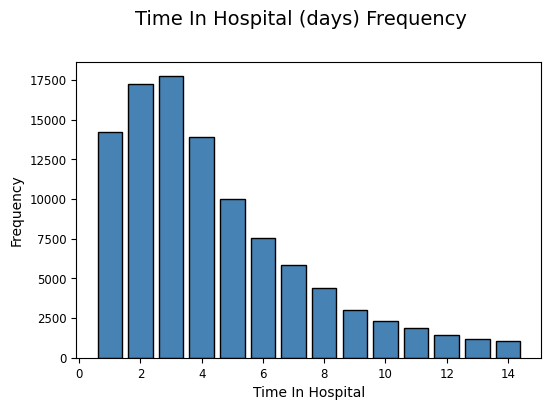

In [42]:
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Time In Hospital (days) Frequency", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Time In Hospital")
ax.set_ylabel("Frequency") 
w_q = table['time_in_hospital'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(w_q[0], w_q[1], color='steelblue', 
        edgecolor='black', linewidth=1)

> Am häufigsten sind Patient:innen für 3 Tage im Krankenhaus. Die Verteilung ist annähernd eine Normalverteilung.

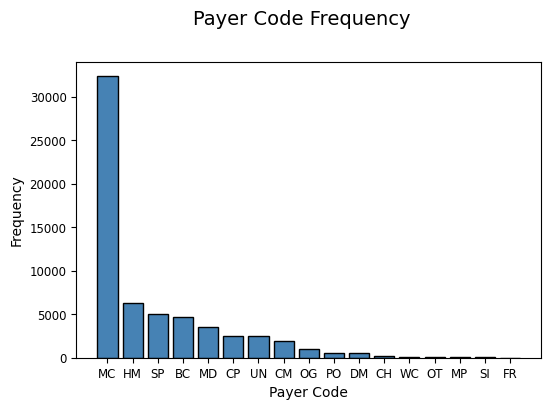

In [43]:
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Payer Code Frequency", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Payer Code")
ax.set_ylabel("Frequency") 
w_q = table['payer_code'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(w_q[0], w_q[1], color='steelblue', 
        edgecolor='black', linewidth=1)

> "Medicare" als "Payer Code" kommt mit Abstand am häufigsten vor.

# Multivariate

## Two Dimensions

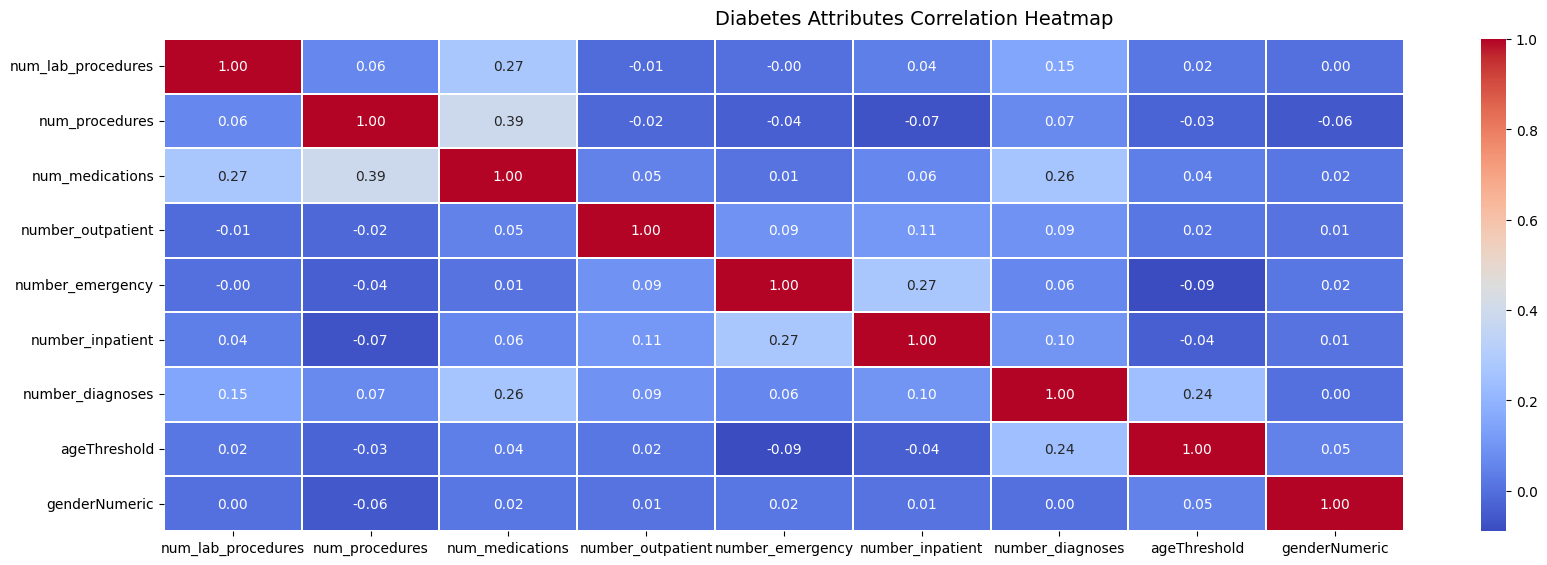

In [44]:
subsetAttributes = ["num_lab_procedures","num_procedures","num_medications","number_outpatient","number_emergency","number_inpatient", "number_diagnoses", "ageThreshold", "genderNumeric"]
f, ax = plt.subplots(figsize=(20, 6))
corr = table[subsetAttributes].corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Diabetes Attributes Correlation Heatmap', fontsize=14)

Es kann beobachtet werden: 
* die Anzahl der verschriebenen Medikamente korreliert mäßig positiv mit der Anzahl der Procedures.
* sehr leichte positive Korrelation zwischen stationären Aufenthalten unnd Anzahl der Notfälle
* sehr leichte positive Korrelation zwischen Anzahl der Diagnosen und der Medikamente
* sehr leichte positive Korrelation zwischen Alter und Anzahl der Diagnosen
* sowie sehr leichte Korrelation zwischen Anzahl der Medikamente und der Anzahl der Laborprozeduren.

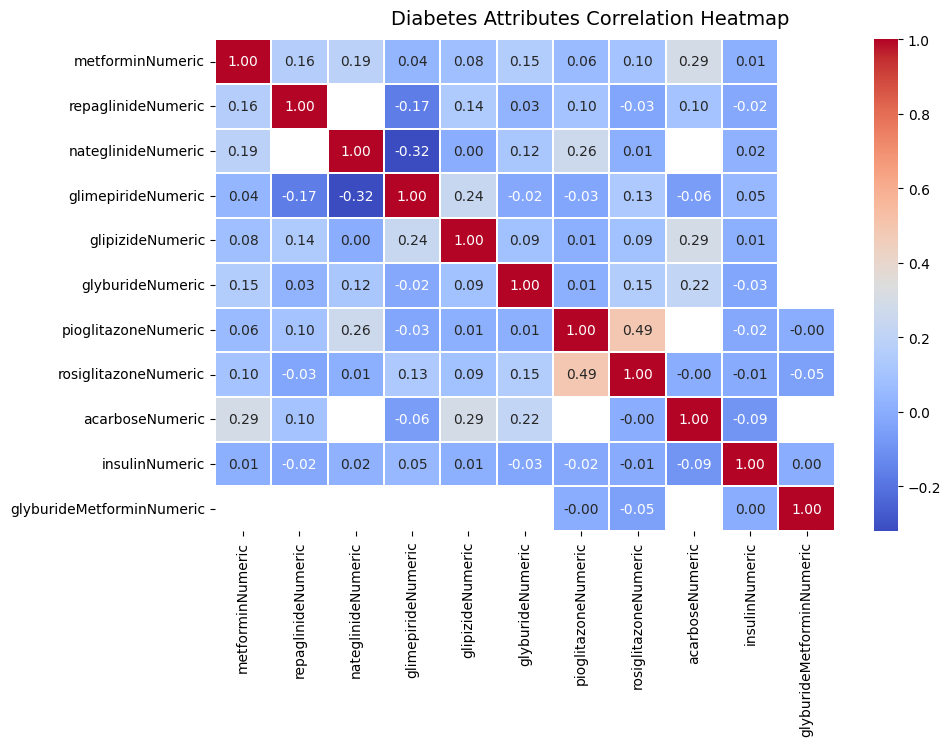

In [45]:
f, ax = plt.subplots(figsize=(10, 6))
corr = table[medicationAttributes].corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Diabetes Attributes Correlation Heatmap', fontsize=14)

Es kann folgendes beobachtet werden: 
* die gesteigerte Einnahme von Pioglitazone korreliert mäßig positiv mit der gesteigerten Einnahme von Rosiglitazone.
* wird die Dosierung von Nateglinide korreliert leicht negativ mit der Einnahme von Glimepiride.


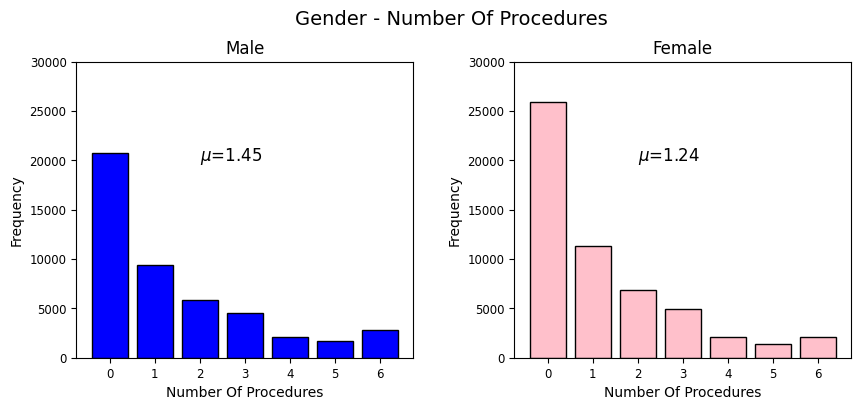

In [46]:
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle("Gender - Number Of Procedures", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Male")
ax1.set_xlabel("Number Of Procedures")
ax1.set_ylabel("Frequency") 
rw_q = male['num_procedures'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.set_ylim([0, 30000])
ax1.tick_params(axis='both', which='major', labelsize=8.5)
ax1.text(2, 20000, r'$\mu$='+str(round(male['num_procedures'].mean(),2)), 
         fontsize=12)
bar1 = ax1.bar(rw_q[0], rw_q[1], color='blue', 
        edgecolor='black', linewidth=1)


ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("Female")
ax2.set_xlabel("Number Of Procedures")
ax2.set_ylabel("Frequency") 
rw_q = female['num_procedures'].value_counts()
ax2.text(2, 20000, r'$\mu$='+str(round(female['num_procedures'].mean(),2)), 
         fontsize=12)
rw_q = (list(rw_q.index), list(rw_q.values))
ax2.set_ylim([0, 30000])
ax2.tick_params(axis='both', which='major', labelsize=8.5)
bar1 = ax2.bar(rw_q[0], rw_q[1], color='pink', 
        edgecolor='black', linewidth=1)

> an Frauen werden statistisch etwas weniger Eingriffe getätigt als an Männern.

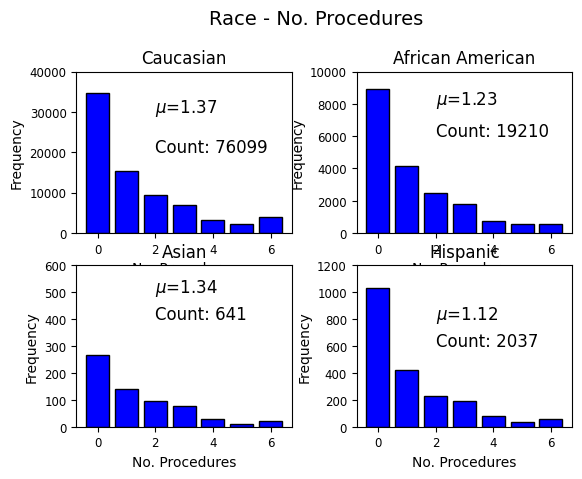

In [47]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
title = fig.suptitle("Race - No. Procedures", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1.set_title("Caucasian")
ax1.set_xlabel("No. Procedures")
ax1.set_ylabel("Frequency") 
rw_q = caucasian['num_procedures'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.set_ylim([0, 40000])
ax1.tick_params(axis='both', which='major', labelsize=8.5)
ax1.text(2, 30000, r'$\mu$='+str(round(caucasian['num_procedures'].mean(),2)), 
         fontsize=12)
ax1.text(2, 20000, "Count: "+str(len(caucasian['num_procedures'])), fontsize=12)

bar1 = ax1.bar(rw_q[0], rw_q[1], color='blue', 
        edgecolor='black', linewidth=1)


#ax2 = fig.add_subplot(1,4, 2)
ax2.set_title("African American")
ax2.set_xlabel("No. Procedures")
ax2.set_ylabel("Frequency") 
rw_q = africanAmerican['num_procedures'].value_counts()
ax2.text(2, 8000, r'$\mu$='+str(round(africanAmerican['num_procedures'].mean(),2)), 
         fontsize=12)
ax2.text(2, 6000, "Count: "+str(len(africanAmerican['num_procedures'])), fontsize=12)
rw_q = (list(rw_q.index), list(rw_q.values))
ax2.set_ylim([0, 10000])
ax2.tick_params(axis='both', which='major', labelsize=8.5)
bar1 = ax2.bar(rw_q[0], rw_q[1], color='blue', 
        edgecolor='black', linewidth=1)

#ax3 = fig.add_subplot(1,2,3)
ax3.set_title("Asian")
ax3.set_xlabel("No. Procedures")
ax3.set_ylabel("Frequency") 
rw_q = asian['num_procedures'].value_counts()
ax3.text(2, 500, r'$\mu$='+str(round(asian['num_procedures'].mean(),2)), 
         fontsize=12)
ax3.text(2, 400, "Count: "+str(len(asian['num_procedures'])), fontsize=12)
rw_q = (list(rw_q.index), list(rw_q.values))
ax3.set_ylim([0, 600])
ax3.tick_params(axis='both', which='major', labelsize=8.5)
bar1 = ax3.bar(rw_q[0], rw_q[1], color='blue', 
        edgecolor='black', linewidth=1)

#ax4 = fig.add_subplot(1,2,4)
ax4.set_title("Hispanic")
ax4.set_xlabel("No. Procedures")
ax4.set_ylabel("Frequency") 
rw_q = hispanic['num_procedures'].value_counts()
ax4.text(2, 800, r'$\mu$='+str(round(hispanic['num_procedures'].mean(),2)), 
         fontsize=12)
ax4.text(2, 600, "Count: "+str(len(hispanic['num_procedures'])), 
         fontsize=12)
rw_q = (list(rw_q.index), list(rw_q.values))
ax4.set_ylim([0, 1200])
ax4.tick_params(axis='both', which='major', labelsize=8.5)
bar1 = ax4.bar(rw_q[0], rw_q[1], color='blue', 
        edgecolor='black', linewidth=1)

ax1.plot(0, 0)
ax2.plot(0, 1)
ax3.plot(1, 0)
ax4.plot(1, 1)



Es gibt keine großen Unterschiede in der durchschnitten Anzahl der Procedures zwischen den Ethnizitäten.

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,tolazamideNumeric,examideNumeric,citogliptonNumeric,insulinNumeric,glyburideMetforminNumeric,glipizideMetforminNumeric,glimepiridePioglitazoneNumeric,metforminRosiglitazoneNumeric,metforminPioglitazoneNumeric,genderNumeric
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,1
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,NaN,None,None,1.0,NaN,NaN,NaN,NaN,NaN,1
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,1
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,NaN,None,None,1.0,NaN,NaN,NaN,NaN,NaN,0
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,NaN,None,None,0.0,NaN,NaN,NaN,NaN,NaN,0


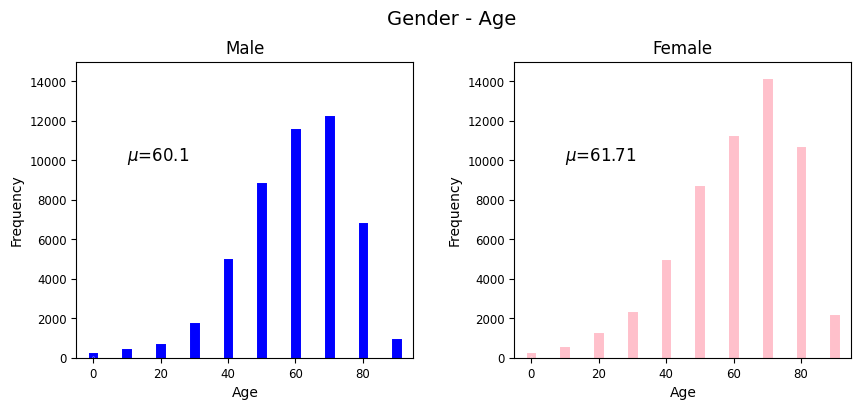

In [48]:
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle("Gender - Age", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Male")
ax1.set_xlabel("Age")
ax1.set_ylabel("Frequency") 
rw_q = male['ageThreshold'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.set_ylim([0, 15000])
ax1.text(10, 10000, r'$\mu$='+str(round(male['ageThreshold'].mean(),2)), 
         fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=8.5)

bar1 = ax1.bar(rw_q[0], rw_q[1], color='blue', 
        edgecolor='blue', linewidth=5)

ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("Female")
ax2.set_xlabel("Age")
ax2.set_ylabel("Frequency") 
rw_q = female['ageThreshold'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax2.text(10, 10000, r'$\mu$='+str(round(female['ageThreshold'].mean(),2)), 
         fontsize=12)
ax2.set_ylim([0, 15000])
ax2.tick_params(axis='both', which='major', labelsize=8.5)
bar1 = ax2.bar(rw_q[0], rw_q[1], color='pink', 
        edgecolor='pink', linewidth=5)

table.head()

> Frauen in dem Datensatz sind durchschnittlich 1.71 Jahre älter. Achtung: Das durchschnittliche Alter ist nicht 61.71, da es sich bei den Zahlen um die untere Grenze einer zehnjährigen Altersgrenze handelt. Sprich: Die meisten Patient:innen sind zwischen 70-80 Jahre alt.

Text(0, 0.5, 'Time In Hospital (days)')

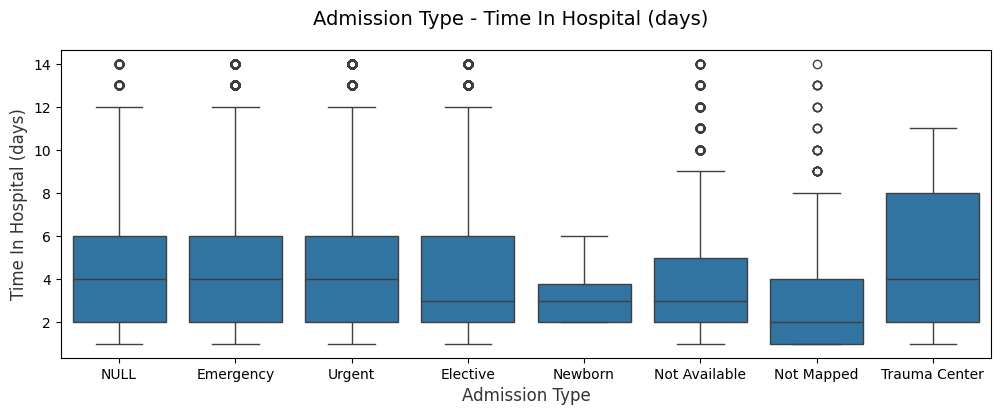

In [49]:
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('Admission Type - Time In Hospital (days)', fontsize=14)

sns.boxplot(x="admissionType", y="time_in_hospital", data=table,  ax=ax)
ax.set_xlabel("Admission Type",size = 12,alpha=0.8)
ax.set_ylabel("Time In Hospital (days)",size = 12,alpha=0.8)

> Bei einer Spitalsaufnahme aufgrund eines Neugeborenen ist die Zeit im Krankenhaus kürzer als bei anderen Gründen, und bei Aufnahme im Traumacenter ist die Zeit im Krankenhaus durchschnittlich etwas länger.

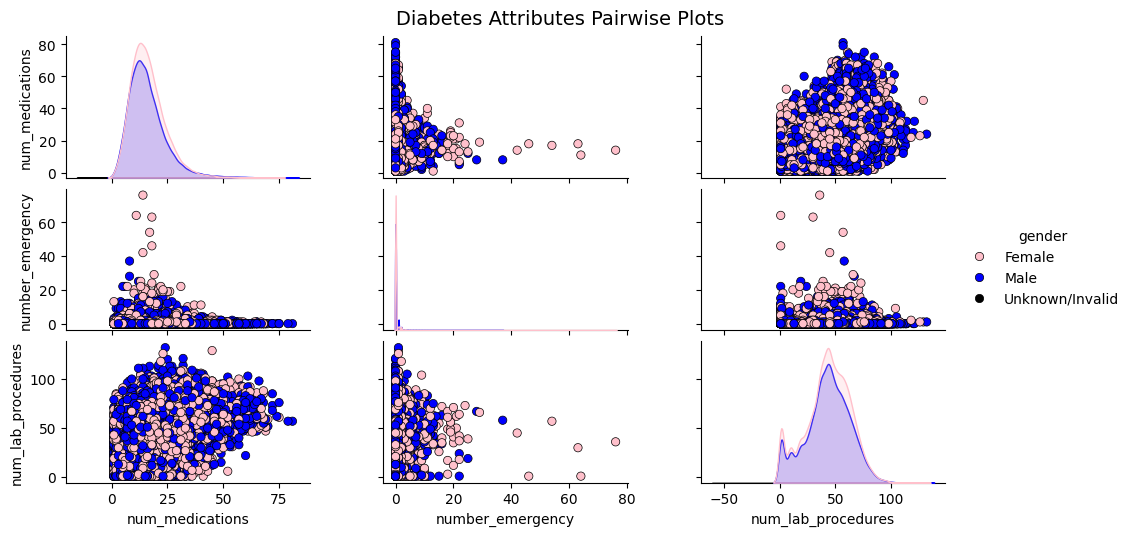

In [50]:
cols = ['gender', 'num_medications', 'number_emergency', 'num_lab_procedures', "weight"]
genderPalette = {"Female": "pink", "Male": "blue", "Unknown/Invalid": "black"}
pp = sns.pairplot(table[cols], hue='gender', height=1.8, aspect=1.8, 
                  palette=genderPalette,
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Diabetes Attributes Pairwise Plots', fontsize=14)

### Three Discrete Categorical attributes

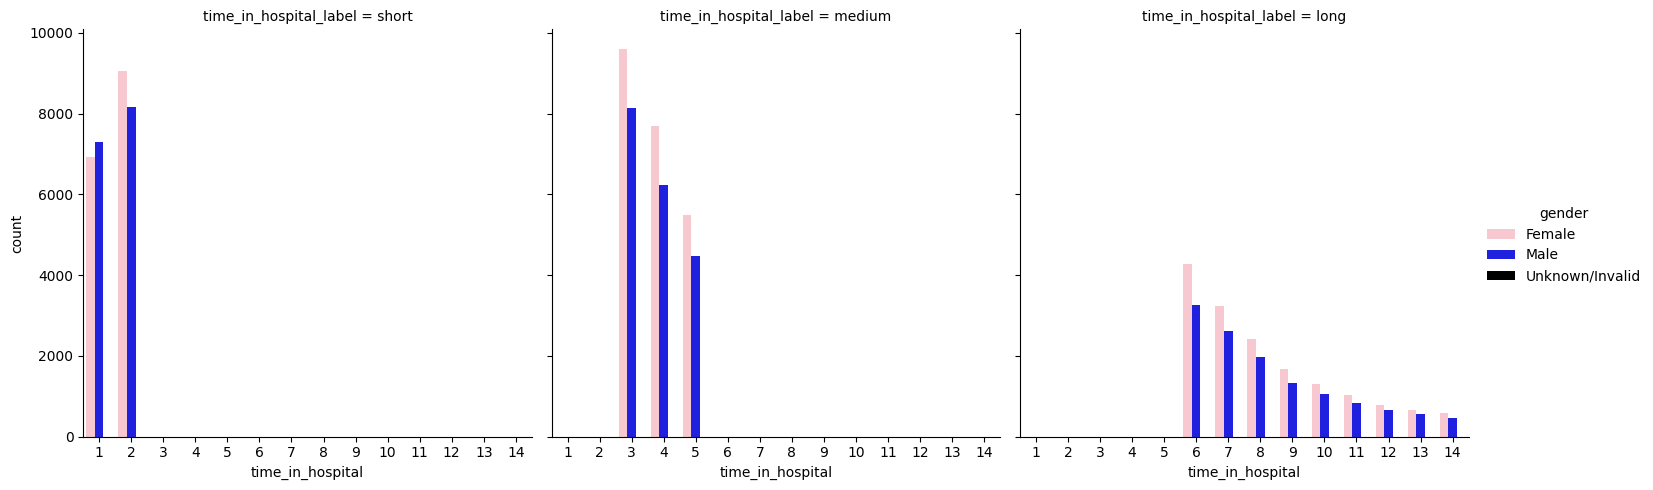

In [51]:
fc = sns.catplot(x="time_in_hospital", hue="gender", col="time_in_hospital_label", 
                    data=table, kind="count",
                    palette=genderPalette)

> Visualisierung, was die (von mir gegebene) Kategorisierung in kurzer-mittlerer-langer Krankenheitsaufenthalt bedeutet. die meisten Patient:innen bleiben nur kurz bis mittelkurz im Krankenheit (in Tagen).

### Mixed attributes (Numeric & Categorical)

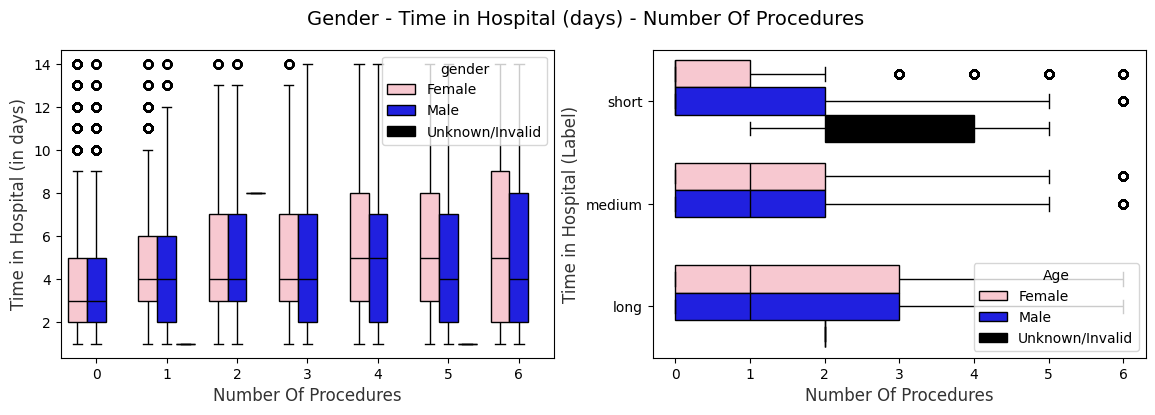

In [52]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
f.suptitle('Gender - Time in Hospital (days) - Number Of Procedures', fontsize=14)

sns.boxplot(y="time_in_hospital", x="num_procedures", hue="gender",
               data=table, palette=genderPalette, ax=ax1)
ax1.set_ylabel("Time in Hospital (in days)",size = 12,alpha=0.8)
ax1.set_xlabel("Number Of Procedures",size = 12,alpha=0.8)

sns.boxplot(y="time_in_hospital_label", x="num_procedures", hue="gender",
               data=table, palette=genderPalette, ax=ax2)
ax2.set_ylabel("Time in Hospital (Label)",size = 12,alpha=0.8)
ax2.set_xlabel("Number Of Procedures",size = 12,alpha=0.8)
l = plt.legend(loc='best', title='Age')

> Je mehr Tage man im Krankenhaus ist, desto mehr Procedures werden gemacht. Zwischen den Geschlechtern gibt es kaum Unterschiede.